Let's Implement PPO. I use the repository, https://github.com/lcswillems/pytorch-a2c-ppo.

In [1]:
import gym
from rltorch import Runner
from rltorch.agents import PPOAgent
from rltorch.processors import AtariProcessor
from rltorch.layers import ACModel, Flatten

import torch.nn as nn
import numpy as np

env = gym.make('CartPole-v0').unwrapped


class CartPoleAgent(PPOAgent):
    def build_model(self, config=None):
        model = nn.Sequential()
        model.add_module('flatten', Flatten())
        in_features = np.prod(self.state_shape)
        print(in_features)
        model.add_module('conv2', nn.Linear(in_features, 16))
        model.add_module('relu2', nn.ReLU())
        model.add_module('conv3', nn.Linear(16, 16))
        model.add_module('relu3', nn.ReLU())

        # Actor layer
        actor_model = nn.Sequential()
        actor_model.add_module('actor_fc', nn.Linear(16, self.action_config['n_action']))
        actor_model.add_module('actor_softmax', nn.Softmax())

        # Value layer
        value_model = nn.Sequential()
        value_model.add_module('value_fc', nn.Linear(16, 1))
        # Combine all models
        ac_model = ACModel(model, actor_model, value_model, self.action_dist)
        return ac_model
    

FRAME_WIDTH = 84
FRAME_HEIGHT = 84
WINDOW_LENGTH = 3
lr = 2.5e-4
# lr = 10
# state_shape = env.observation_space.shape
# state_shape = (WINDOW_LENGTH, FRAME_WIDTH, FRAME_HEIGHT)
state_shape = (WINDOW_LENGTH,) + env.observation_space.shape
action_config = {'n_action': env.action_space.n, 'type': 'integer'}
processor = AtariProcessor(FRAME_WIDTH, FRAME_HEIGHT)
processor = None
agent = CartPoleAgent(state_shape, action_config, processor=processor,
                 window_length=WINDOW_LENGTH, n_epochs=3,
                 lr=lr, entropy_coef=0.01, value_loss_coef=1,
                 batch_size=32 * 4, num_frames_per_proc=128, debug=False)

runner = Runner(env, agent, num_workers=4, multi=True)

optimized_agent = runner.simulate(training=True, notebook=True, render_freq=4)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Delete old tensorboard log
12


/home/tom/work/library/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


HBox(children=(IntProgress(value=0, max=1000000), HTML(value='')))

/home/tom/anaconda3/lib/python3.6/site-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


KeyboardInterupt
KeyboardInterupt
KeyboardInterupt


KeyboardInterrupt: 

In [19]:
env.observation_space.shape

(4,)

In [2]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace

/home/tom/anaconda3/lib/python3.6/site-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


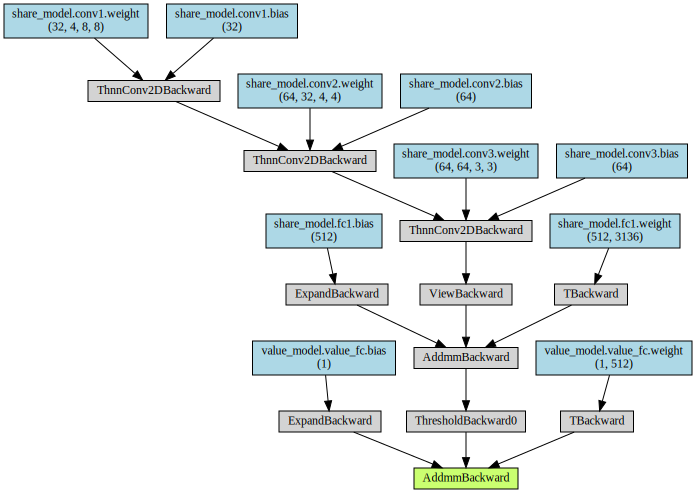

In [12]:
state = torch.tensor(agent.memory.get_state_idx(5), dtype=torch.float)

make_dot(agent.ac_model(state)[1], params=dict(agent.ac_model.named_parameters()))

In [14]:
help(nn.Conv1d)

Help on class Conv1d in module torch.nn.modules.conv:

class Conv1d(_ConvNd)
 |  Applies a 1D convolution over an input signal composed of several input
 |  planes.
 |  
 |  In the simplest case, the output value of the layer with input size
 |  :math:`(N, C_{in}, L)` and output :math:`(N, C_{out}, L_{out})` can be
 |  precisely described as:
 |  
 |  .. math::
 |  
 |      \begin{equation*}
 |      \text{out}(N_i, C_{out_j}) = \text{bias}(C_{out_j}) +
 |                              \sum_{k = 0}^{C_{in} - 1} \text{weight}(C_{out_j}, k) \star \text{input}(N_i, k)
 |      \end{equation*},
 |  
 |  where :math:`\star` is the valid `cross-correlation`_ operator,
 |  :math:`N` is a batch size, :math:`C` denotes a number of channels,
 |  :math:`L` is a length of signal sequence.
 |  
 |  * :attr:`stride` controls the stride for the cross-correlation, a single
 |    number or a one-element tuple.
 |  
 |  * :attr:`padding` controls the amount of implicit zero-paddings on both sides
 |    for

In [9]:
state.shape

(4, 4, 84, 84)

In [7]:
torch.chunk(x, 3, 0)

(tensor([[ 0.5716,  0.7730, -0.9750,  1.1229]], dtype=torch.float64),
 tensor([[-1.2867,  0.6309,  1.0654, -0.8968]], dtype=torch.float64),
 tensor([[ 2.1899, -0.0554,  0.0463,  0.5020]], dtype=torch.float64))

In [5]:
help(b.detach)

Help on built-in function detach:

detach(...) method of torch.Tensor instance
    Returns a new Tensor, detached from the current graph.
    
    The result will never require gradient.
    
    .. note::
    
      Returned Tensor uses the same data tensor as the original one.
      In-place modifications on either of them will be seen, and may trigger
      errors in correctness checks.



In [2]:
import torch.distributions as dist

In [7]:
x = dist.Normal(0, 1)

In [4]:
sample = x.sample()

In [8]:
sample.requires_grad

False

In [8]:
x.entropy()

tensor(1.4189)

In [2]:
state = env.reset()

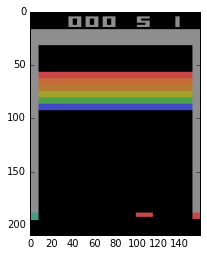

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(state)

In [7]:
gray_state = processor.process(state)

/home/tom/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [9]:
gray_state.shape

(1, 84, 84)

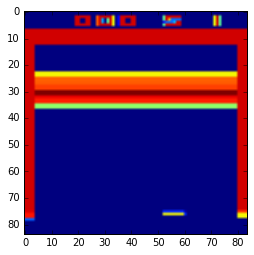

In [11]:
plt.imshow(gray_state[0])

In [13]:
import numpy as np

np.max(gray_state)

0.6013647058823529

In [14]:
np.min(gray_state)

0.0

In [3]:
import gym
env = gym.make('CartPole-v0').unwrapped

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/home/tom/work/library/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


In [23]:
obs = env.reset()

In [28]:
import numpy as np
agent.predict(np.array([[obs for _ in range(4)]]))

RuntimeError: Given groups=1, weight[16, 4, 2], so expected input[1, 16, 4] to have 4 channels, but got 16 channels instead